## 금융사기 예측
- 데이터셋 : creditcard
- 목적 : 금융사기 예측
- 피쳐 : 

[1] 모듈 로딩

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[2] 데이터 준비

In [5]:
file_path = r'C:\Users\KDP15\Desktop\KDT6\머신러닝\미니프로젝트\creditcard.csv'
df = pd.read_csv(file_path)
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [10]:
from sklearn.model_selection import train_test_split

In [51]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [52]:
# 특징과 레이블 분리
X = df.drop('Class', axis=1)
y = df['Class']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [18]:
y_train_res.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [30]:
from sklearn.utils import resample

In [60]:
from sklearn.utils import resample

# 오버샘플링된 데이터를 다시 축소
X_train_downsampled, y_train_downsampled = resample(X_train_res, y_train_res, 
                                                    n_samples=10000, # 원하는 샘플 크기
                                                    random_state=42)

In [61]:
y_train_downsampled.value_counts()

Class
1    5026
0    4974
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [39]:
params = {
    'n_estimators': [100, 200],
    'max_depth': range(2, 16),
    'min_samples_leaf': range(5,16),
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [40]:
rf = RandomForestClassifier(random_state=42)

grid_search = RandomizedSearchCV(estimator=rf, param_distributions=params,
                           verbose=4)

grid_search.fit(X_train_downsampled, y_train_downsampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=log_loss, max_depth=11, min_samples_leaf=5, n_estimators=200;, score=0.996 total time=  55.0s
[CV 2/5] END criterion=log_loss, max_depth=11, min_samples_leaf=5, n_estimators=200;, score=0.996 total time= 1.0min
[CV 3/5] END criterion=log_loss, max_depth=11, min_samples_leaf=5, n_estimators=200;, score=0.997 total time= 1.1min
[CV 4/5] END criterion=log_loss, max_depth=11, min_samples_leaf=5, n_estimators=200;, score=0.996 total time= 1.0min
[CV 5/5] END criterion=log_loss, max_depth=11, min_samples_leaf=5, n_estimators=200;, score=0.996 total time= 1.0min
[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=15, n_estimators=100;, score=0.967 total time=  19.5s
[CV 2/5] END criterion=log_loss, max_depth=5, min_samples_leaf=15, n_estimators=100;, score=0.969 total time=  20.0s
[CV 3/5] END criterion=log_loss, max_depth=5, min_samples_leaf=15, n_estimators=100;, score=0.970 total time=  19.9s
[CV

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(2, 16),
                                        'min_samples_leaf': range(5, 16),
                                        'n_estimators': [100, 200]},
                   verbose=4)

In [41]:
# 모델 파라미터

print(f'[searchCV.best_score_ ] {grid_search.best_score_}')
print(f'[searchCV.best_params_] {grid_search.best_params_}')
print(f'[searchCV.best_estimator_] {grid_search.best_estimator_}')

cv_resultDF = pd.DataFrame(grid_search.cv_results_)

[searchCV.best_score_ ] 0.9976800000000001
[searchCV.best_params_] {'n_estimators': 100, 'min_samples_leaf': 5, 'max_depth': 14, 'criterion': 'log_loss'}
[searchCV.best_estimator_] RandomForestClassifier(criterion='log_loss', max_depth=14, min_samples_leaf=5,
                       random_state=42)


In [62]:
best_model = grid_search.best_estimator_

In [66]:
train_pre = best_model.predict(X_train_downsampled)
test_pre = best_model.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
print(classification_report(y_test, test_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.45      0.89      0.60        98

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [70]:
print(confusion_matrix(y_test, test_pre))

[[56759   105]
 [   11    87]]


In [72]:
importances = best_model.feature_importances_

In [73]:
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

In [86]:
importances

array([0.00700253, 0.00788676, 0.03258849, 0.06443705, 0.11379499,
       0.00656679, 0.00894993, 0.01837259, 0.00925585, 0.02488068,
       0.12235372, 0.05023684, 0.11022941, 0.00678261, 0.21588425,
       0.00407783, 0.03942434, 0.08389239, 0.01001841, 0.0061975 ,
       0.00584277, 0.01360894, 0.00443984, 0.00421142, 0.0031659 ,
       0.0034486 , 0.0046572 , 0.00573198, 0.00718169, 0.00487865])

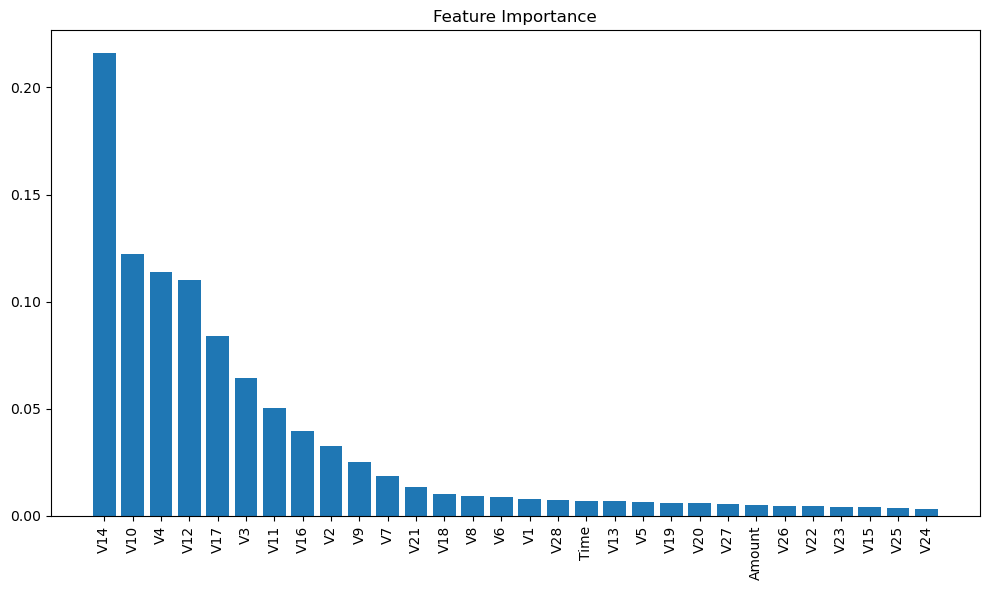

In [74]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [95]:
n = 14
top_n_features = feature_names[indices][:n]

In [96]:
X_train_top = X_train_downsampled[top_n_features]
X_test_top = X_test[top_n_features]

In [97]:
params = {
    'n_estimators': [100, 200],
    'max_depth': range(2, 16),
    'min_samples_leaf': range(5,16),
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [98]:
rf = RandomForestClassifier(random_state=42)

grid_search_top = RandomizedSearchCV(estimator=rf, param_distributions=params,
                           verbose=4)

grid_search_top.fit(X_train_top, y_train_downsampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=100;, score=0.979 total time=   2.5s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=100;, score=0.971 total time=   2.5s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=100;, score=0.975 total time=   2.4s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=100;, score=0.968 total time=   2.5s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=100;, score=0.977 total time=   2.5s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=13, n_estimators=200;, score=0.960 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=13, n_estimators=200;, score=0.954 total time=   1.8s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=13, n_estimators=200;, score=0.959 total time=   1.8s
[CV 4/5] END criterion=gini, max_depth=2

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(2, 16),
                                        'min_samples_leaf': range(5, 16),
                                        'n_estimators': [100, 200]},
                   verbose=4)

In [78]:
best_model = grid_search_top.best_estimator_

In [79]:
best_model

RandomForestClassifier(criterion='log_loss', max_depth=14, min_samples_leaf=7,
                       random_state=42)

In [83]:
print(f'[searchCV.best_score_ ] {grid_search.best_score_}')
print(f'[searchCV.best_params_] {grid_search.best_params_}')
print(f'[searchCV.best_estimator_] {grid_search.best_estimator_}')


[searchCV.best_score_ ] 0.9976800000000001
[searchCV.best_params_] {'n_estimators': 100, 'min_samples_leaf': 5, 'max_depth': 14, 'criterion': 'log_loss'}
[searchCV.best_estimator_] RandomForestClassifier(criterion='log_loss', max_depth=14, min_samples_leaf=5,
                       random_state=42)


In [81]:
train_pre_top=best_model.predict(X_train_top)
test_pre_top = best_model.predict(X_test_top)

In [85]:
print(confusion_matrix(y_test, test_pre_top))

[[56421   443]
 [    9    89]]


In [84]:
print(classification_report(y_test, test_pre_top))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.91      0.28        98

    accuracy                           0.99     56962
   macro avg       0.58      0.95      0.64     56962
weighted avg       1.00      0.99      0.99     56962

